# Crab Pulsar Spin Rate and Slow Down Rate
#### Problem : How much the Crab pulsar has slowed down since launch of AstroSat? Finding rate of spin down rate of Crab pulsar with AstroSat LAXPC and CZTI observations.
<small><b>CREDIT: [JASHANPREET SINGH DINGRA](https://astrodingra.github.io) | ISRO DATA ARCHIVE</b></small>


<small><li>Data Collection : <b style=" color:blue">https://astrobrowse.issdc.gov.in/astro_archive/archive/Search.jsp</b></li></smal>

---

In [10]:
# importing useful Libraries
from astropy.io import fits 
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Function to load and inspect FITS file
def inspect_fits_file(fits_file):
    # Open the FITS file
    with fits.open(fits_file) as hdul:
        # Print the FITS file structure
        hdul.info()

        # Load the data table
        data = hdul[1].data
        print("\nData Columns:\n", data.columns)
        
# assigning fits files
fits_file = 'lxp_l1/laxpc/06029/lxp3/modeEA/AS1A02_090T01_9000000778lxp3EA_level1.fits'

# Inspect the FITS file
inspect_fits_file(fits_file)


Filename: lxp_l1/laxpc/06029/lxp3/modeEA/AS1A02_090T01_9000000778lxp3EA_level1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   ()      
  1  LAXPC_MODEEA    1 BinTableHDU     39   7433R x 9C   [D, 7J, K, 2048B, I, I, I, 36I, 36I]   
  2  GTI           1 BinTableHDU     21   2265R x 2C   [1D, 1D]   
  3  BTI           1 BinTableHDU     21   2265R x 2C   [1D, 1D]   

Data Columns:
 ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'GRT'; format = '7J'
    name = 'FrameSequenceNumber'; format = 'K'
    name = 'DataArray'; format = '2048B'
    name = 'DecodingStatusFlag'; format = 'I'
    name = 'DecodingErrorCount'; format = 'I'
    name = 'DecodingErrorCorrCount'; format = 'I'
    name = 'ErrorLocation'; format = '36I'
    name = 'DecodingErrorCorrFlag'; format = '36I'
)


First 10 arrival times:
[2.16299918e+08 2.16300166e+08 2.16300172e+08 2.16300172e+08
 2.16300172e+08 2.16300172e+08 2.16300172e+08 2.16300174e+08
 2.16300174e+08 2.16300175e+08]

First 50 arrival times:
[2.16299918e+08 2.16300166e+08 2.16300172e+08 2.16300172e+08
 2.16300172e+08 2.16300172e+08 2.16300172e+08 2.16300174e+08
 2.16300174e+08 2.16300175e+08 2.16300175e+08 2.16300175e+08
 2.16300175e+08 2.16300175e+08 2.16300175e+08 2.16300176e+08
 2.16300176e+08 2.16300176e+08 2.16300176e+08 2.16300176e+08
 2.16300176e+08 2.16300176e+08 2.16300177e+08 2.16300177e+08
 2.16300177e+08 2.16300177e+08 2.16300177e+08 2.16300177e+08
 2.16300178e+08 2.16300178e+08 2.16300178e+08 2.16300178e+08
 2.16300178e+08 2.16300178e+08 2.16300178e+08 2.16300178e+08
 2.16300179e+08 2.16300179e+08 2.16300179e+08 2.16300179e+08
 2.16300179e+08 2.16300179e+08 2.16300179e+08 2.16300179e+08
 2.16300180e+08 2.16300180e+08 2.16300180e+08 2.16300180e+08
 2.16300180e+08 2.16300180e+08]

First 10 spin periods:
[2.476045

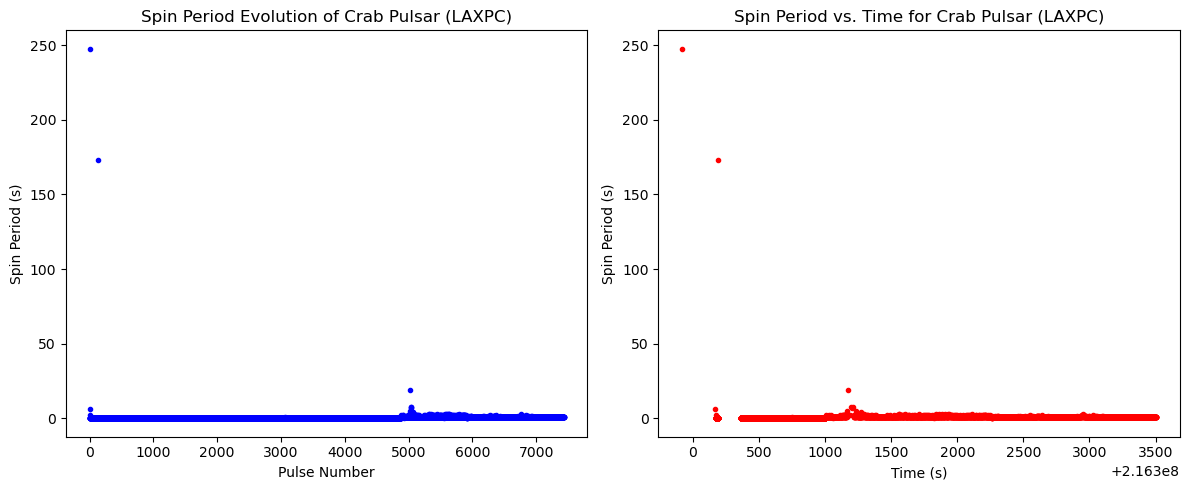

In [12]:
# Function to load and inspect the TIME column from the FITS file
def load_time_column(fits_file):
    # Open the FITS file
    with fits.open(fits_file) as hdul:
        # Load the data table
        data = hdul[1].data
        # Extract the TIME column
        arrival_times = data['TIME']
    return arrival_times
# Load the TIME column data
arrival_times = load_time_column(fits_file)

# Print a sample of the arrival times
print("First 10 arrival times:")
print(arrival_times[:10])

# If you want to see more arrival times, you can print more samples
print("\nFirst 50 arrival times:")
print(arrival_times[:50])

# Sort the arrival times (just in case they are not sorted)
arrival_times.sort()

# Calculate spin periods by finding the difference between consecutive arrival times
spin_periods = np.diff(arrival_times)

# Print a sample of the calculated spin periods
print("\nFirst 10 spin periods:")
print(spin_periods[:10])

# Plot the spin periods to visualize the spin rate
plt.figure(figsize=(12, 5))

# Plot 1: Spin periods against pulse number
plt.subplot(1, 2, 1)
plt.plot(spin_periods, 'b.')
plt.xlabel('Pulse Number')
plt.ylabel('Spin Period (s)')
plt.title('Spin Period Evolution of Crab Pulsar (LAXPC)')

# Plot 2: Spin periods against time
# We need to exclude the last arrival time since np.diff reduces the array length by 1
time_intervals = arrival_times[:-1]

plt.subplot(1, 2, 2)
plt.plot(time_intervals, spin_periods, 'r.')
plt.xlabel('Time (s)')
plt.ylabel('Spin Period (s)')
plt.title('Spin Period vs. Time for Crab Pulsar (LAXPC)')

plt.tight_layout()
plt.show()

<b>Graph 1: Spin Period vs. Pulse Number</b><br>
Plot Description:<br>

X-axis: Pulse Number (index of each spin period in the sequence).<br>
Y-axis: Spin Period (time between consecutive pulses, in seconds).<br><br>
<b>Interpretation:</b><br>

<b>This plot shows how the spin period changes with each successive pulse.
If the pulsar is spinning down (i.e., its spin rate is decreasing), you might observe a trend where the spin periods gradually increase.
Any irregularities or significant deviations could indicate noise, observational errors, or interesting astrophysical phenomena such as glitches (sudden changes in spin period).</b>

<b style="color:blue">Since this is a single dataset we can't see a significant spin down rate. For effective results we need more data or we can simple predict future spin down rate on the basis of this data only and then we can match it by analysing year long dataset.</b>
<br><br>
<b>Graph 2: Spin Period vs. Time</b><br>
Plot Description:<br>

X-axis: Time (seconds since the start of the observation or another reference point).<br>
Y-axis: Spin Period (time between consecutive pulses, in seconds).<br><br>
<b>Interpretation:</b><br>

<b>This plot shows how the spin period changes over the actual observation time.
A clear increasing trend in the spin periods over time indicates that the pulsar is gradually slowing down.
This plot can also help identify long-term trends and any short-term variations in the pulsar's spin period.</b><br><br>
<i>Detailed Insights</i><br><br>
Spin-Down Rate:<br>

Graph 2 is particularly useful for calculating the spin-down rate, which is the rate at which the pulsar's rotation slows down over time. This can be done by fitting a linear or polynomial model to the data in this plot.<br><br>
Periodic Variations:

Both graphs can reveal periodic variations in the spin period, which might be related to intrinsic properties of the pulsar or external influences.<br><br>
Glitches:

Pulsars sometimes exhibit glitches, which are sudden increases in spin frequency (decreases in spin period). These would appear as sharp dips in the spin period in both plots.



Estimated Spin-Down Rate: 0.00024953285935368436 seconds per second


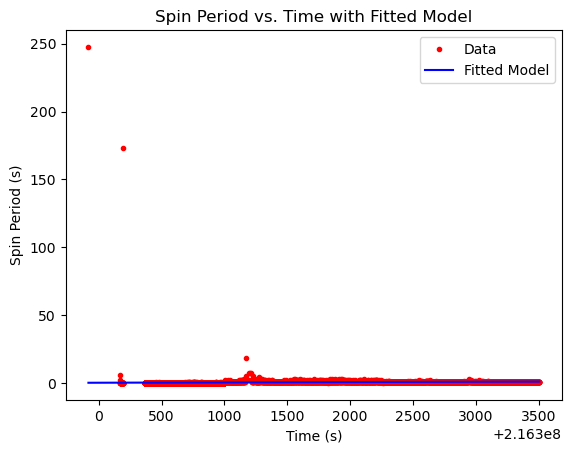

Estimated Spin-Down Rate: 131.1544708762965 minutes per year
Estimated Spin-Down Rate: 2.185907847938275 hours per year


In [13]:
from scipy.optimize import curve_fit

# Define a linear function for fitting
def linear_fit(x, a, b):
    return a * x + b

# Perform the curve fitting
params, covariance = curve_fit(linear_fit, time_intervals, spin_periods)

# Extract the parameters
spin_down_rate_per_sec = params[0]  # a in the linear equation y = a * x + b

# Print the spin-down rate
print(f"Estimated Spin-Down Rate: {spin_down_rate_per_sec} seconds per second")

seconds_per_minute = 60
minutes_per_hour = 60
hours_per_day = 24
days_per_year = 365

# Calculate the conversion
spin_down_rate_per_year_sec = spin_down_rate_per_sec * seconds_per_minute * minutes_per_hour * hours_per_day * days_per_year
spin_down_rate_per_year = spin_down_rate_per_year_sec / 60
spin_down_rate_per_year_hr = spin_down_rate_per_year / 60 


# Plot the data and the fitted model
plt.plot(time_intervals, spin_periods, 'r.', label='Data')
plt.plot(time_intervals, linear_fit(time_intervals, *params), 'b-', label='Fitted Model')
plt.xlabel('Time (s)')
plt.ylabel('Spin Period (s)')
plt.title('Spin Period vs. Time with Fitted Model')
plt.legend()
plt.show()

# Print the result
print(f"Estimated Spin-Down Rate: {spin_down_rate_per_year} minutes per year")

print(f"Estimated Spin-Down Rate: {spin_down_rate_per_year_hr} hours per year")


<small>One the basis of a datasets we peridicted that the Crab Nebula is slowing by <b style="color:blue">2.18 hours per years</b>, to verify it we will take a year long datasets soon, and will be uploaded on github.</small>

# THE END 
###### <b>Ping astrodingra@gmail.com or astrodingra@icloud.com or dm on instagram [@astrodingra](https://wwww.instagram.com/astrodingra) for any quieries </b>